# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
used_device_raw= pd.read_csv("used_device_data.csv")

## 1. Data Overview

- Observations
- Sanity checks

### 1.1 User defined function 


In [3]:
def checkthedata(df):
    """ Give key values of the data frame df """
    # display 2 rows from the beginning and the end of the dataframe and 10 randomly picked ones from inbetween
    display(df.head(2))
    display(df.tail(2))
    np.random.seed(1)
    display(df.sample(n=10))

    # print key information about the dataframe
    
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.\n") # shape
    display(df.info()) # columns & datatypes
    print('\033[1m' + "\nDescribe Data:"+ '\033[0m')
    df_num=df.select_dtypes('number')
    df_cat=df.drop(df_num.columns,axis=1)
    print('\033[1m' + "\nNumerical Variables:"+ '\033[0m')    
    display(df_num.describe(include="all").T) # describe number values
    print('\033[1m' + "\nNon Numerical Variables:"+ '\033[0m')    
    display(df_cat.describe(include="all").T) # describe non-number values
    print('\033[1m' + "\nMissing Values:"+ '\033[0m')    
    print(df.isnull().sum()) # missing values
    print('\033[1m' + "\nDuplicates:"+ '\033[0m')  
    print(df.duplicated().sum()) # Duplicates


## 2. Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [4]:
checkthedata(used_device_raw)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.5,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.3,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.24,62.31


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


There are 3454 rows and 15 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404

None


Describe Data:

Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20



Non Numerical Variables:


,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302



Missing Values:
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

Duplicates:
0


### Observations

- There are 34 Brandnames over 4 Operating Systems, 93 of which are Adroids
- For 3302 of the phones, 4G is available and 5g for 2335.
- Technical overwiew:
    - Screen size averages around 13.7cm and ranges from 5.1cm to 30.7cm
    - Resolution of the rear camera averages around 9.4megapixels and ranges from 0.1-48 with 179 not having one
    - Resolution of the front camera averages around 6.6megapixels and ranges from 0.3-32 with 41 not having one
    - Internal memory ranges from .01 to 1024GB
    - RAM ranges from .02 to 12GB
    - Energy capacity of the device battery ranges from 500 to 9720mAh
    - The weight of the devices ranges from 69g to 855g
- The release years ranges from 2013 to 2020
- The devices have been used between 91 to 1094 days before refurbishing
- The price for the devices when new ranges from 18.20-2560.20 in Euros
- The resale price after refurbishing ranges from 4.65-749.52




In [5]:
""" a block of user defined functions to look at individual variables from a dataframe: 
    - box_hist: plot boxplot and histogram next to each other
    - find_outliers: checks for outliners that are more than x-times IQR away from the data mean
    - check_number_variable: analyzes at a numerical variable
    - labeled_barplot: plots a barplot
    - check_out_object: analyzes a non-numerical variable
    - check_transformations: check different transformations for distribiution

"""

def box_hist(name,df,binsplot=20,Headline="",plotrow=1,allrows=1):
    
    """    
    plotting a boxplot and a histogram next to each other
    name = name of variable in df
    df=dataframe
    binsplot=number of bins in histograms
    Headline=title of plot
    allrows = all rows in figure if several columns need to be plotted below each other
    plot size needs to be defined before running this function so it can be run in loops
     """   


    if Headline=="":Headline=name # the title of the plot

    #left box plot
    plt.subplot(allrows,2,plotrow*2-1); 
    plt.xlabel(name);
    sns.boxplot(data = df, x =df[name]).set(xlabel=Headline);

    #right histogram 
    plt.subplot(allrows,2,plotrow*2); 
    plt.xlabel(Headline);
    #plt.ylabel("number of people who landed on page");
    plt.axvline(df[name].mean(), color='g', linewidth=2,label="Mean"); #green mean line
    plt.axvline(df[name].median(), color='b', linestyle='dashed', linewidth=2,label="Median"); #blue dashed median line
    plt.legend()
    sns.histplot(df[name],bins=binsplot,kde="kde");
    



def find_outliers(data,iqr_multiplier=4):
    
    """ checks for outliners that are more than iqr_multipliere*IQR away from the data mean """
    data=data.dropna() #drop missing values
    all=data.count() #number of elements
    q1 = np.percentile(data, 25) # 25 percentile mark of data
    q2 = np.percentile(data, 50) # 50 percentile mark = median of data    
    q3 = np.percentile(data, 75) # 75 percentile mark of data

    IQR = q3-q1 #Inter quartile range 
    lwr_bound = q2-iqr_multiplier*IQR #lower end for outliners
    upr_bound = q2+iqr_multiplier*IQR #upper end for outliners

    #j = np.array(all)
    upper_percent=sum(i > upr_bound for i in data)/all*100 #count data in upper outliner range in % of all data
    lower_percent=sum(i < lwr_bound for i in data)/all*100  #count data in lower outliner range in % of all data
    
    upperandlower=upper_percent+lower_percent # % all outliers

    return upper_percent,lower_percent,upperandlower,lwr_bound,upr_bound


def check_number_variable(df,name):
    
    """ 
    analyzes at a numerical variable, print statistical values and plot a boxplot and a histogram
    """

    #find the correct row for our variable in df.describe().T
    j=name 
    t=0
    p=0
    for i in df.select_dtypes('number').columns:
        if i==j:
            p=1
        if p==0:
            t=t+1
    data_describe=df.describe().T
    
    # pick the row and put it into a new df
    show_me=data_describe[t:t+1].copy()
    
    # add number of unique values, number of missing values, skewness, and % outliners in 4IQR range

    show_me['unique values']=df[j].nunique()
    show_me['missing values']=df[j].isnull().sum()
    show_me['skewedness']=round(df[j].skew(),1)
    show_me['% outliers 2IQR']=round(find_outliers(df[j],iqr_multiplier=2)[2],2)
    show_me['% outliers 4IQR']=round(find_outliers(df[j])[2],2)
  
    #display statistical values
    display(show_me)
    
    #plot boxplot and histogram
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    box_hist(name,df,binsplot=20,Headline="")
    



def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with count or percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() 
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
def check_out_object(df,name):

    """ 
    look at a categorical/object variable, print statistical values and plot a barplot
    """

    # print barplot
    labeled_barplot(df, name, perc=True, n=None)
    
    # new df with top 5 and their percentage value
    df1=pd.DataFrame(round(df[name].value_counts(2)*100,1),df[name].value_counts().keys()[0:5])
    
    # new df with describe() of the column
    df2=pd.DataFrame(df[name].describe())

    #Transpose describe df
    df3=df2.T
    # add missing values
    df3['missing values']=df[name].isnull().sum()
    # combine dfs and rename column headers in df1 to add '%' 
    df3=df3.join(df1.T.rename(columns=lambda s: "%"+s))

    display(df3)
    
    
    
def check_transformations(df,name,plot='no'):
    
    """ 
    look at a numerical variable, print statistical values and plot a boxplot and a histogram
    df: dataframe
    name: name of columns
    plot='yes' if the plots for the transformations are wanted
    """

    df_trafo=pd.DataFrame() #empty df to be filled with values for original, log transformed and sqrt transformed data

    df_trafo['regular']=df[name]
    logproblem=False # default, will be set to True if data = 0 or negative
    
    # handle log distribution
    if df[df[name]<0].shape[0]>0: #If negative values
        df_trafo['log']=0
        logproblem=True
    elif df[df[name]==0].shape[0]>0: # if 0 values a minimal value is added to the 0 values
        addthis=df[df[name]>0][name].min()/10000
        df_trafo['log']=np.log(df[name]+addthis)
    else:  
        df_trafo['log']=np.log(df[name])

    #sqrt distribiution
    df_trafo['sqrt']=np.sqrt(df[name])
   
    # describe & transpose trafo df
    data_describe=df_trafo.describe().T
    
    show_me=data_describe.copy()
    
    # add skewness, number of unique values and number of missing values
    show_me['skewedness']=(df_trafo['regular'].skew(),df_trafo['log'].skew(),df_trafo['sqrt'].skew())
    show_me['% 2IQRoutliers']=(find_outliers(df_trafo['regular'],iqr_multiplier=2)[2],find_outliers(df_trafo['log'],iqr_multiplier=2)[2],find_outliers(df_trafo['sqrt'],iqr_multiplier=2)[2])
    show_me['% 4IQRoutliers']=(find_outliers(df_trafo['regular'])[2],find_outliers(df_trafo['log'])[2],find_outliers(df_trafo['sqrt'])[2])

    
    #display statistical values
    display(show_me)

    #plot boxplot and histogram if plot=yes
    if plot=='yes':

        fig = plt.gcf()
        fig.set_size_inches(16,4)
        binsplot=20

    
        #left plot regular data
        plt.subplot(1,3,1); 
        plt.xlabel('regular');
        plt.axvline(df_trafo['regular'].mean(), color='g', linewidth=2,label="Mean");
        plt.axvline(df_trafo['regular'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
        plt.legend()
        sns.histplot(df_trafo['regular'],bins=binsplot,kde="kde");
    
        #middle plot log data, if no data was negative
        if logproblem==False:
            plt.subplot(1,3,2); 
            plt.xlabel('log');
            #plt.ylabel("number of people who landed on page");
            plt.axvline(df_trafo['log'].mean(), color='g', linewidth=2,label="Mean");
            plt.axvline(df_trafo['log'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
            plt.legend()
            sns.histplot(df_trafo['log'],bins=binsplot,kde="kde");
    
        #right plot sqrt distribiution
        plt.subplot(1,3,3); 
        plt.xlabel('sqrt');
        plt.axvline(df_trafo['sqrt'].mean(), color='g', linewidth=2,label="Mean");
        plt.axvline(df_trafo['sqrt'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
        plt.legend()
        sns.histplot(df_trafo['sqrt'],bins=binsplot,kde="kde");    
    


#### Brand Name (brand_name)

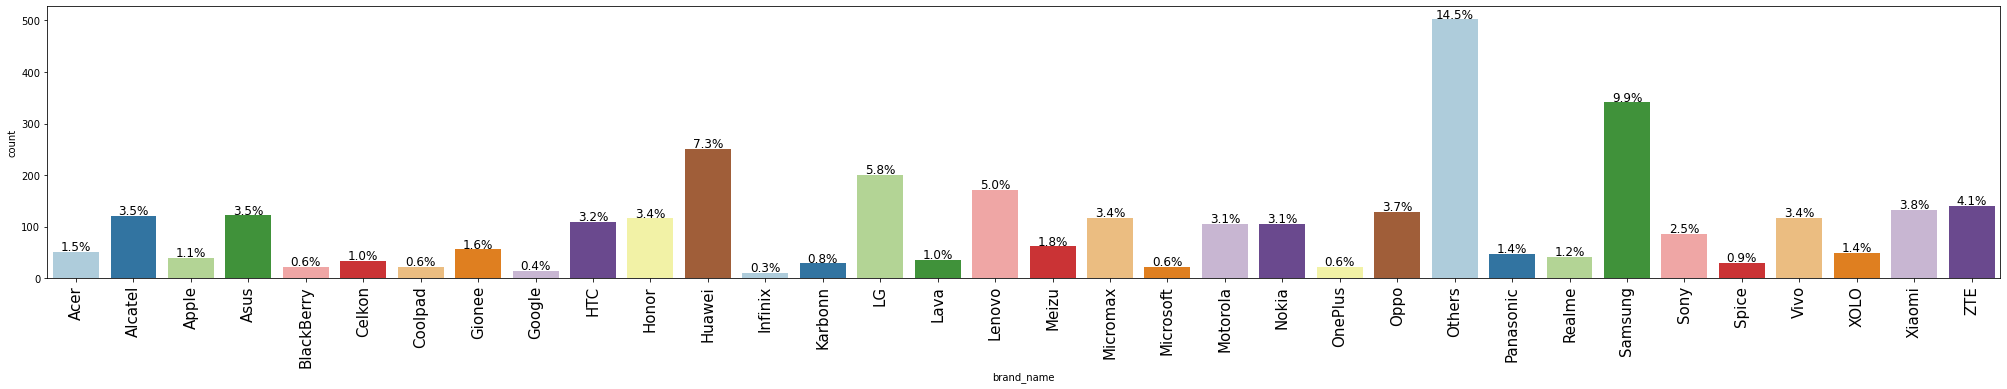

,count,unique,top,freq,missing values,%Others,%Samsung,%Huawei,%LG,%Lenovo
brand_name,3454,34,Others,502,0,14.5,9.9,7.3,5.8,5.0


In [6]:
check_out_object(used_device_raw,'brand_name')

There are 33 unique brands listed, with Samsung selling 10% of the different devices. However 'Others' combined are at 14.5%

#### Operating System (os)

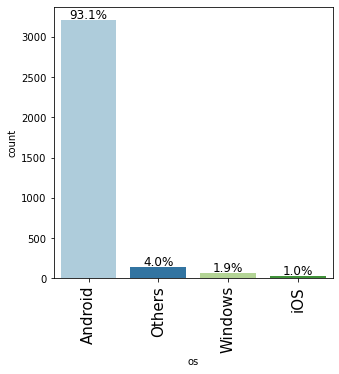

,count,unique,top,freq,missing values,%Android,%Others,%Windows,%iOS
os,3454,4,Android,3214,0,93.1,4.0,1.9,1.0


In [7]:
check_out_object(used_device_raw,'os')

#### Observation
Of the 3454 devices in our data set, 93% run on Android, 2% on Windows and 1% on iOS. All other operating sytems together account for 4%. 



#### Screen Size

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
screen_size,3454.0,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71,142,0,1.0,9.99,3.47


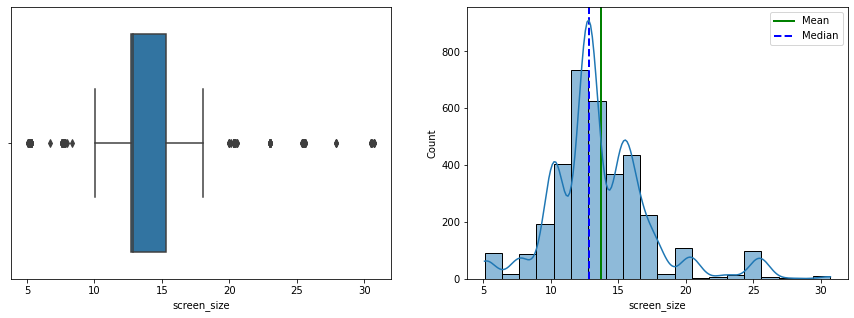

In [8]:
check_number_variable(used_device_raw,'screen_size')

Screen size varies from 5.08 to 30.71 cm. The data is right skewed and 3.5% of the data are exttreme outliers, the outliers seen in the boxplot represent 10% of the data.(%outliers 2IQR is the percent of data that is more than 2*IQR from the median (the outliers in the boxplots), %outliers 4IQR is the percent of data that is more than 4*IQR away.) 

#### 4g available

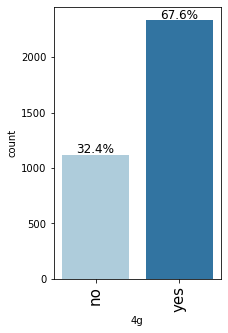

,count,unique,top,freq,missing values,%yes,%no
4g,3454,2,yes,2335,0,67.6,32.4


In [9]:
check_out_object(used_device_raw,'4g')

4g is available on 68% of the devices.

#### 5g available

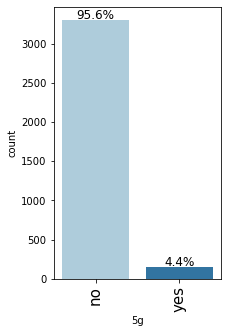

,count,unique,top,freq,missing values,%no,%yes
5g,3454,2,no,3302,0,95.6,4.4


In [10]:
check_out_object(used_device_raw,'5g')

In [11]:
print("5g yes & 4g no:",used_device_raw[(used_device_raw['5g'] =="yes")&(used_device_raw['4g'] =="no")]['brand_name'].count())
print("5g no & 4g no:",used_device_raw[(used_device_raw['5g'] =="no")&(used_device_raw['4g'] =="no")]['brand_name'].count())

5g yes & 4g no: 0
5g no & 4g no: 1119


5g is only available on 4.4% of all the devices, and all of those obviously have 4g as well. 32% don't have a network at all (s.4g)

#### Resolution of back camera

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0,41,179,0.8,0.15,0.15


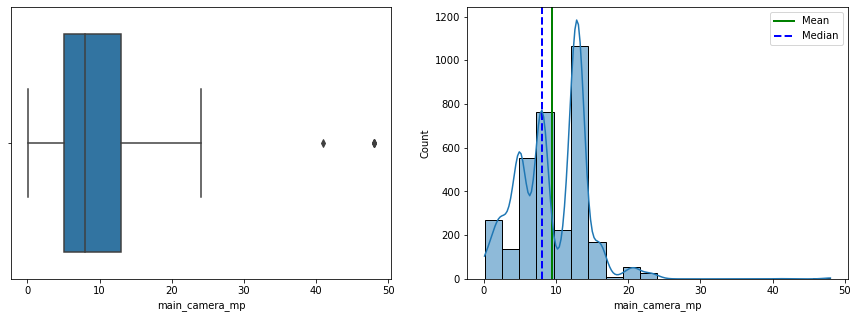

In [12]:
check_number_variable(used_device_raw,'main_camera_mp')

The resolution on the back camera varies between .08 and 48 mps. The data is moderately right skewed and there are 179 missing values and we have a few extreme outliers. 

#### Front facing camera

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
selfie_camera_mp,3452.0,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0,37,2,1.8,6.4,2.72


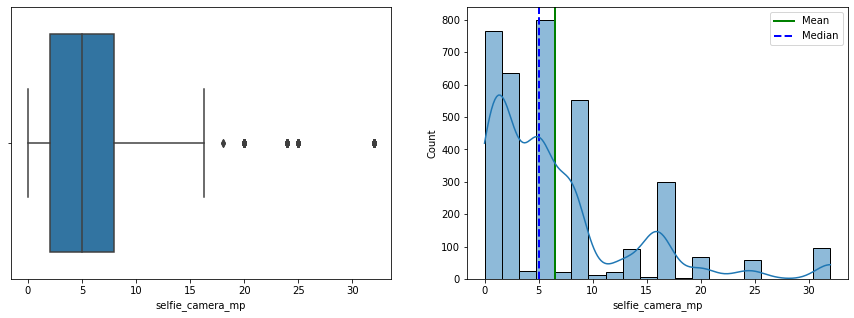

In [13]:
check_number_variable(used_device_raw,'selfie_camera_mp')

In [14]:
print(f"{used_device_raw[used_device_raw['selfie_camera_mp'] ==0]['selfie_camera_mp'].count()} devices have a value of 0, so they either don't have a front facing camera or are missing this value.")

39 devices have a value of 0, so they either don't have a front facing camera or are missing this value.


In [15]:
print("Devices without selfie camera or missing values:",used_device_raw[(used_device_raw['selfie_camera_mp'] ==0)]['selfie_camera_mp'].count()+used_device_raw['selfie_camera_mp'].isnull().sum())
print("Average megapixels for selfie camera over all devices with one:",used_device_raw[used_device_raw['selfie_camera_mp'] >0]['selfie_camera_mp'].mean()) #only including brands with selfie camera
print("Minumum megapixels for selfie camera over all devices with one:",used_device_raw[used_device_raw['selfie_camera_mp'] >0]['selfie_camera_mp'].min()) #only including brands with selfie camera


Devices without selfie camera or missing values: 41
Average megapixels for selfie camera over all devices with one: 6.629123937884492
Minumum megapixels for selfie camera over all devices with one: 0.3


The resolution on the front facing camera varies between .03 and 32 mps. The data is severely right skewed and with 2 missing values and 39 devices with 0mps, that either don't have a front facing camera or are missing this value.  

#### Internal Memory

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
int_memory,3450.0,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0,15,4,5.8,4.0,4.0


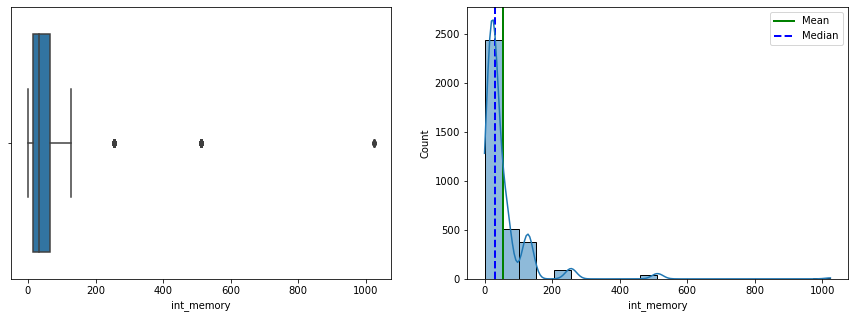

In [16]:
check_number_variable(used_device_raw,'int_memory')

ROM is between 0.01 and 1024GB. 75% of the devices have ROM lower than 64GB. The data is right highly skewed with a few outliers and 4 missing values.

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
ram,3450.0,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0,12,4,1.1,18.41,18.41


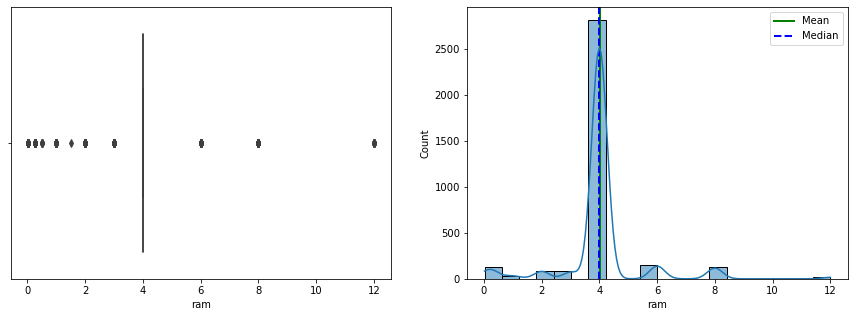

In [17]:
check_number_variable(used_device_raw,'ram')

RAM is between .02 and 12GB, but basically 4GB and everything else are outliers. There are 4 missing values.

#### Battery

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
battery,3448.0,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0,324,6,1.3,2.23,0.0


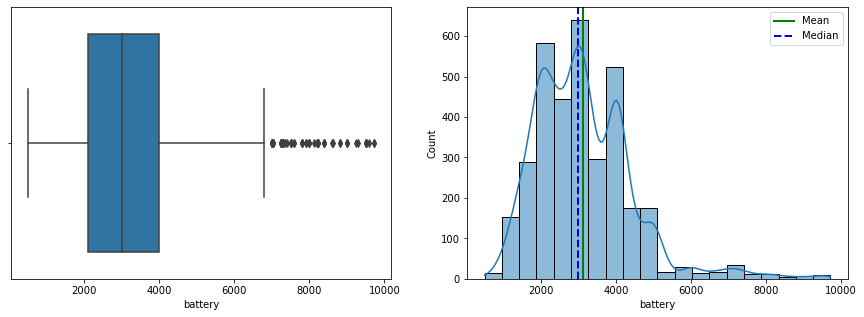

In [18]:
check_number_variable(used_device_raw,'battery')

The average energy capacity is 3133 mAh with 75% of the data below 4000mAh. The data is right skewed and there are 4 missing values.

#### Weight

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
weight,3447.0,182.751871,88.413228,69.0,142.0,160.0,185.0,855.0,555,7,3.2,10.62,6.3


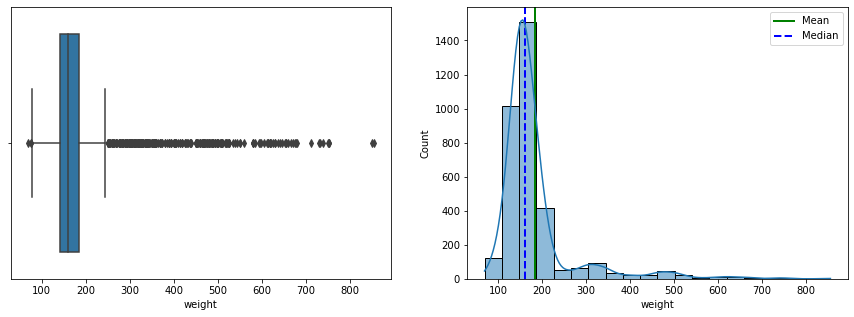

In [19]:
check_number_variable(used_device_raw,'weight')

The devices weigh between 69 and 855g. The data is highly right skewed and there are a lot of outliners and also some missing values.

#### Release Year

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
release_year,3454.0,2015.965258,2.298455,2013.0,2014.0,2015.5,2018.0,2020.0,8,0,0.3,0.0,0.0


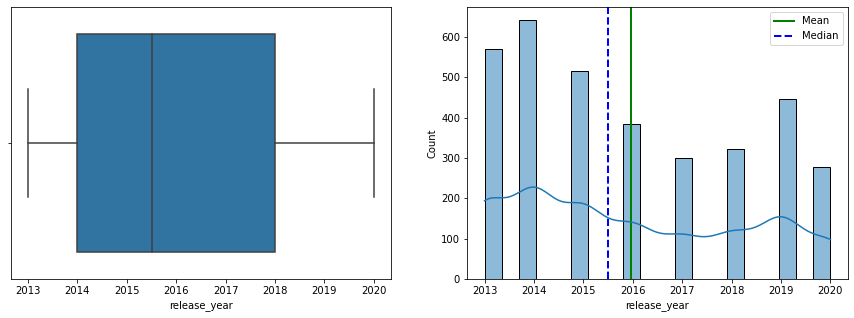

In [20]:
check_number_variable(used_device_raw,'release_year')

The release year is fairly evenly didtributed with 50% of the devices being released from 2013-2015 and the other half from 2016-2020.

#### Days Used

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
days_used,3454.0,674.869716,248.580166,91.0,533.5,690.5,868.75,1094.0,924,0,-0.3,0.0,0.0


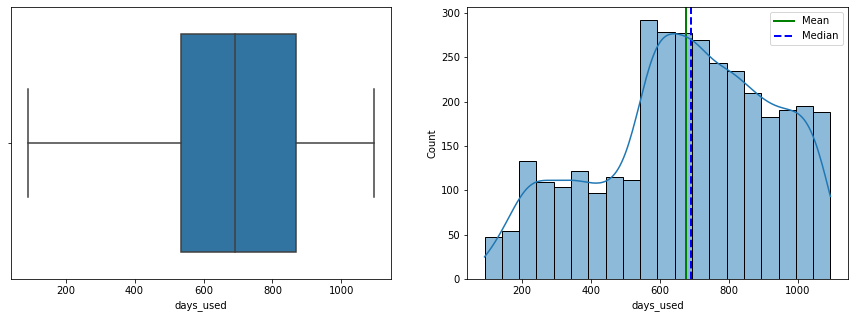

In [21]:

check_number_variable(used_device_raw,'days_used')

The devices have been used between 91-1094 days with 50% of them between 533 and 868 days before refurbishing.

#### New Price

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
new_price,3454.0,237.038848,194.302782,18.2,120.3425,189.785,291.115,2560.2,2988,0,3.8,5.7,1.59


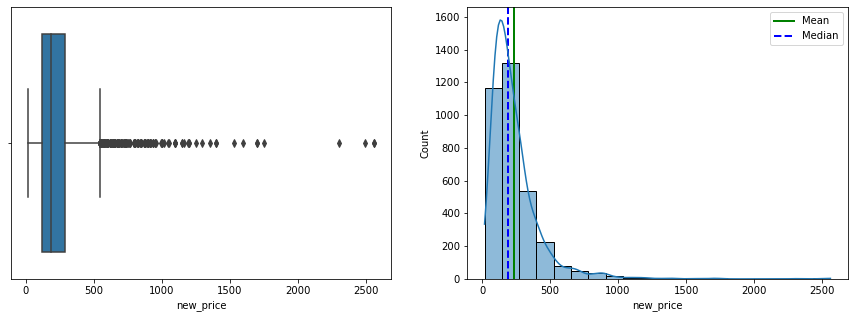

In [22]:
check_number_variable(used_device_raw,'new_price')

The new price is between €18.20 and €2560. The data is highly right skewed with some outliners.

#### Used Price

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
used_price,3454.0,92.302936,54.701648,4.65,56.4825,81.87,116.245,749.52,3094,0,2.3,4.0,0.46


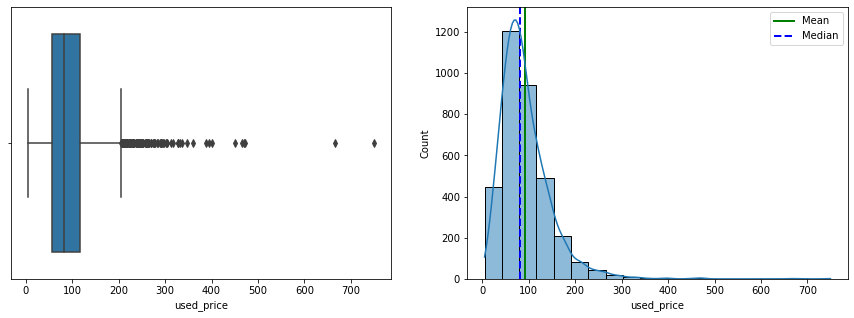

In [23]:
check_number_variable(used_device_raw,'used_price')

The price at resale is between €4.65 and €750. The data is highly right skewed with some outliners.

#### Percent 
I made a new column with the percent used price of new price, to see how much value is lost between new sale and refurbished sale.

In [24]:
used_device_raw['percent']=round(used_device_raw['used_price']/used_device_raw['new_price']*100,2)

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
percent,3454.0,44.881506,16.115763,8.85,33.59,42.93,54.5075,98.43,2580,0,0.6,1.74,0.0


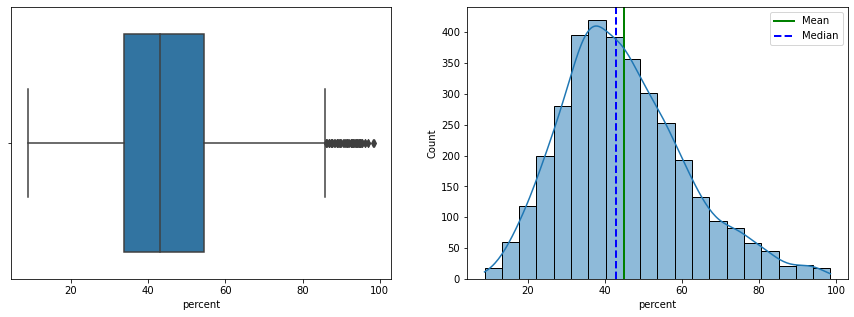

In [25]:
check_number_variable(used_device_raw,'percent')

A device's resale price is between 9% and 98.5% of the new price with an average of 45%.

### Additional Examination

In [26]:
#How many devices have the exact same technical characteristics
used_device_raw.groupby(['os','screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year']).size().value_counts()

1    2606
2     279
4      12
3      10
6       1
5       1
dtype: int64

#### Observation
There are 2606 devices with a unique technical characteristics set, 279 sets appear twice and 24 sets appear between 3-6 times.

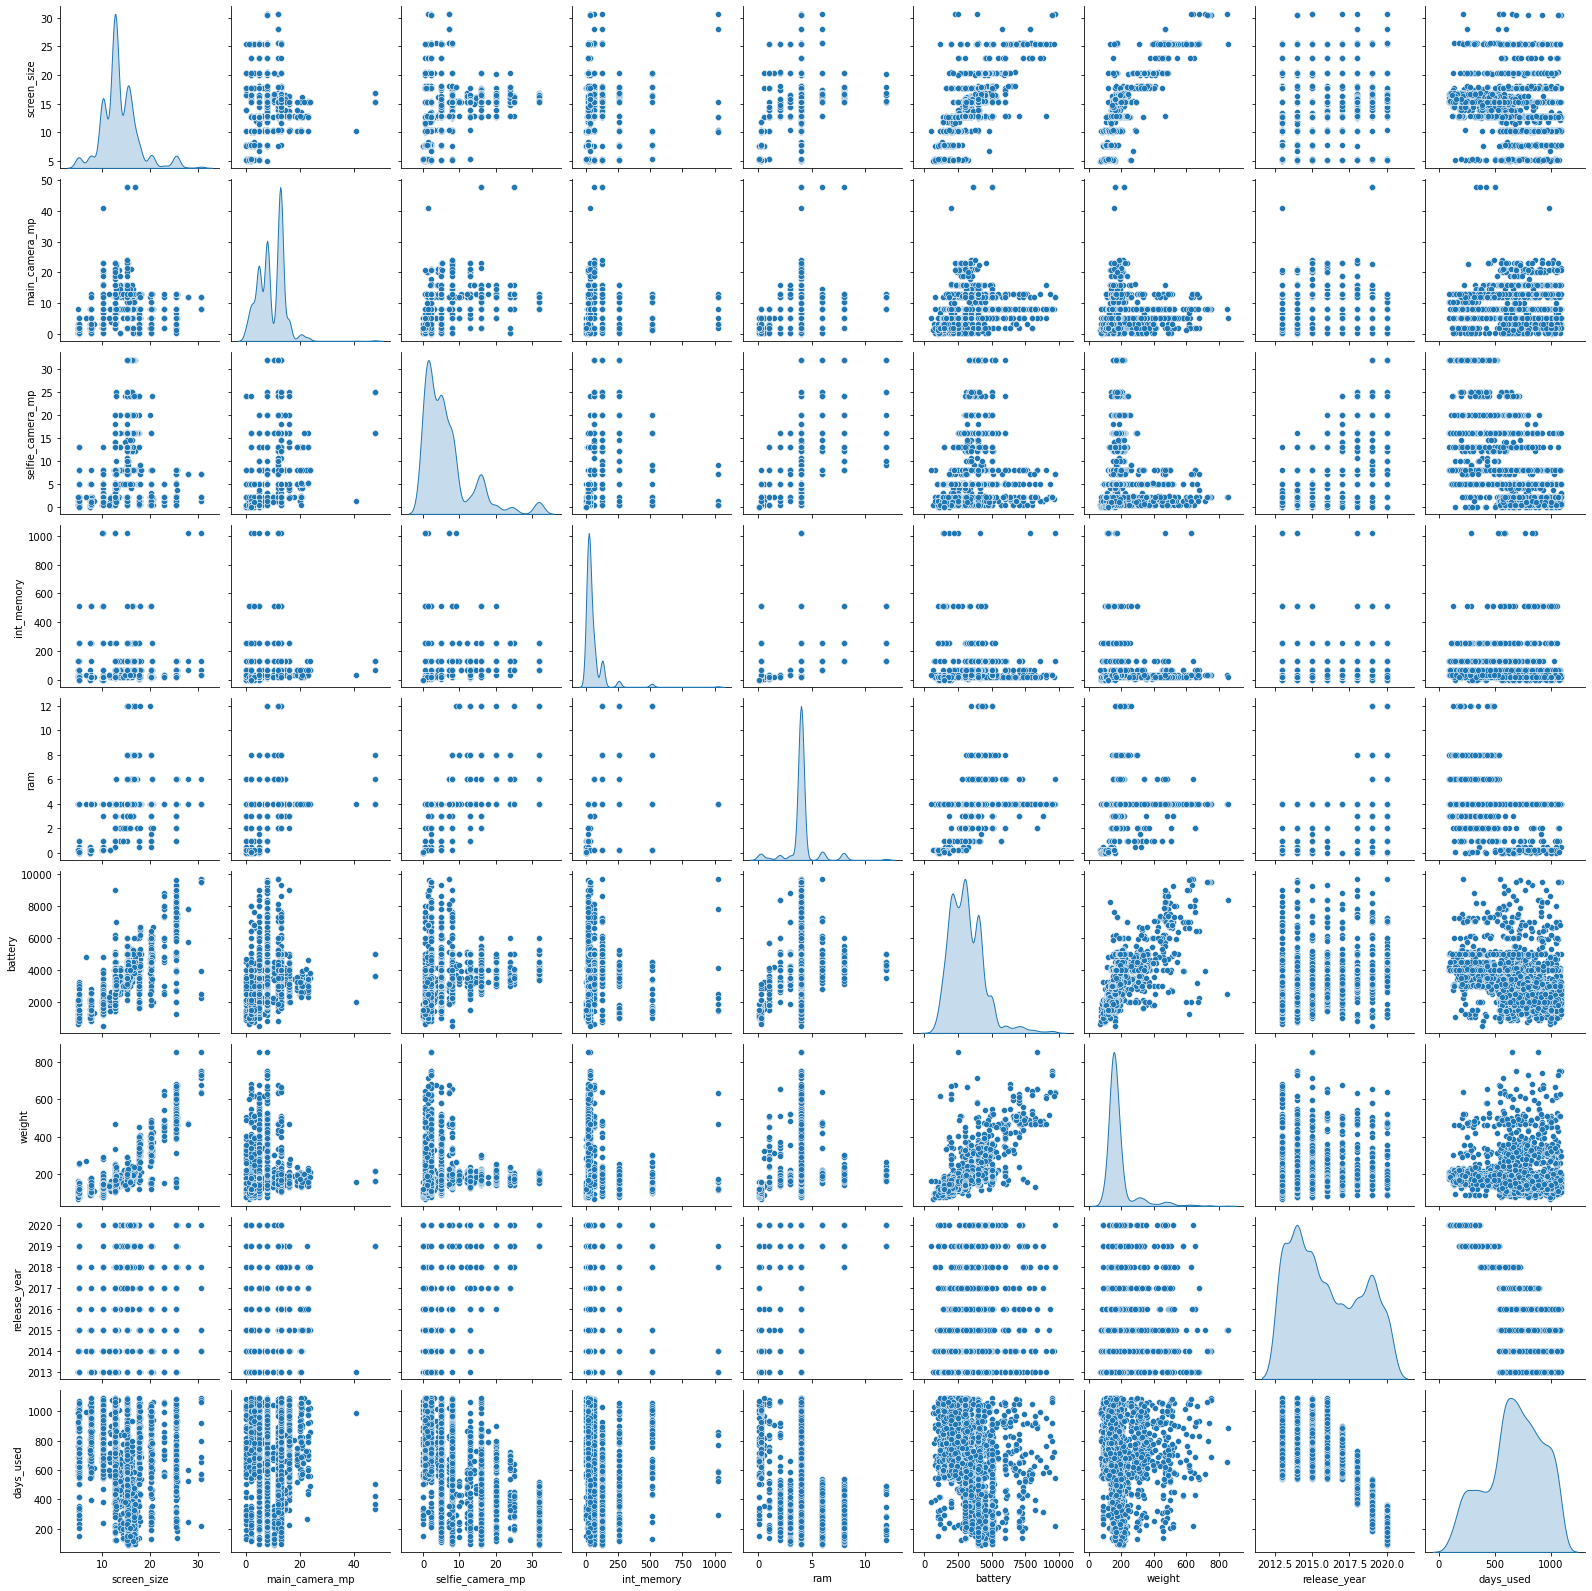

In [27]:
used_device_attr = used_device_raw.iloc[:, 0:13]
sns.pairplot(
   used_device_attr, diag_kind="kde")

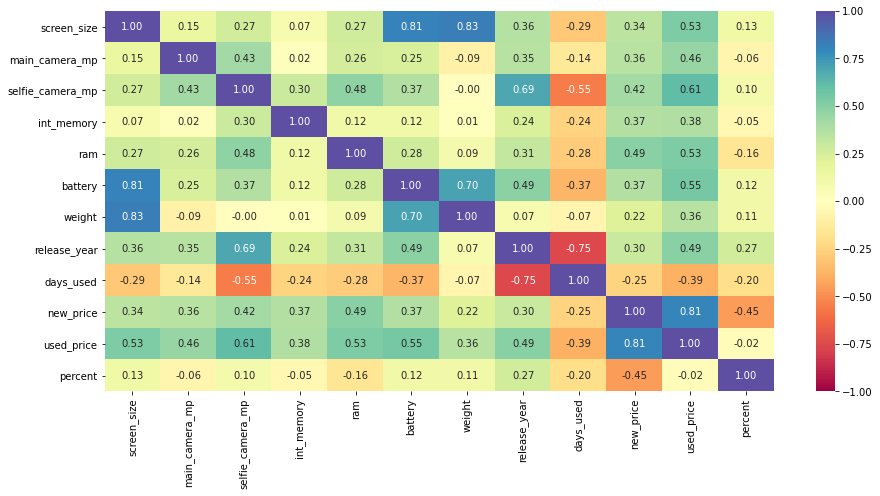

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(used_device_raw.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Weight, battery and screen size are highly correlated as are used price and new price.

Let's compare used_prize/new_prize ('percent') with a few variables.

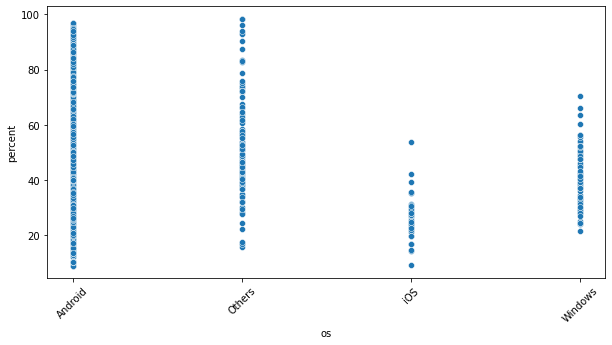

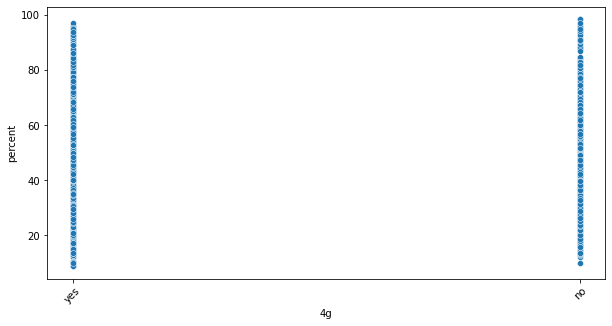

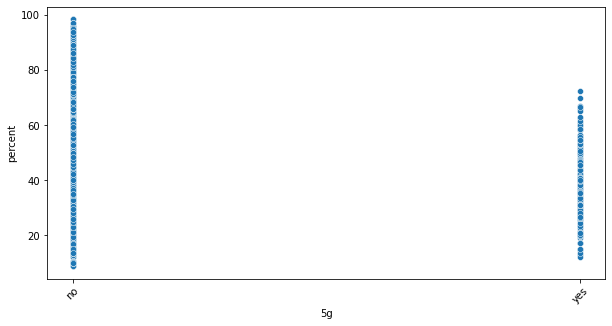

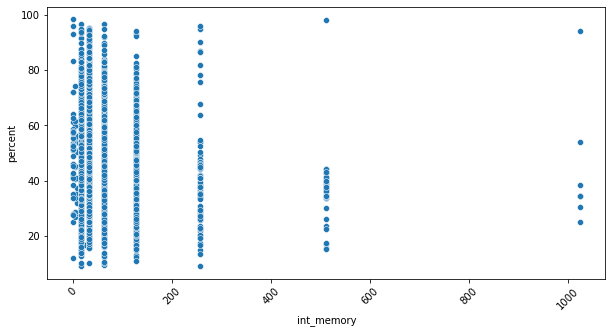

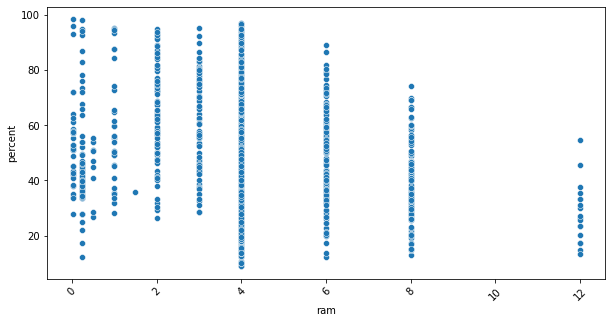

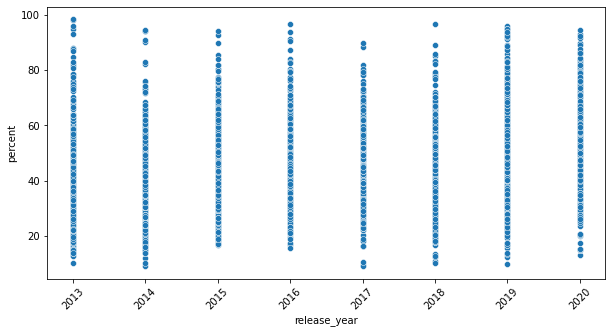

In [29]:
cols_percent=['os','4g','5g','int_memory','ram','release_year']
for i in used_device_raw[cols_percent]:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=used_device_raw, x=i, y="percent")
    plt.xticks(rotation=45)
    plt.show()

#### Observations

- Mostly IOS devices, but also Windows devices seem to loose more of their value between new sale and resale than Android and Others.
- 5g devices loose more of the new value than devices without 5g
- Devices with very high internal memory have a lower resale percentage.
- The higher the ram in the above average category, the lower is the used price compared to the new price.
- The graph for release year doesn't give any obvious conclusions which is astonishing. I would have expected this to go down significantly the earlier it was released. 
- I looked at all the other column plots seperately, but no obvious results came out of them.


Let's take a coloser look at the brands vs the number variables.


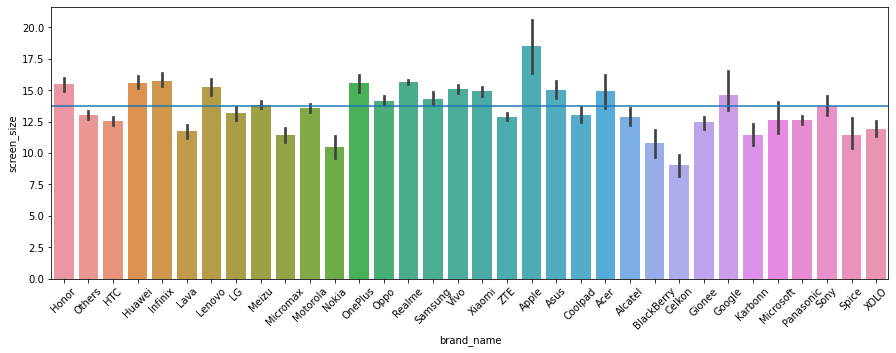

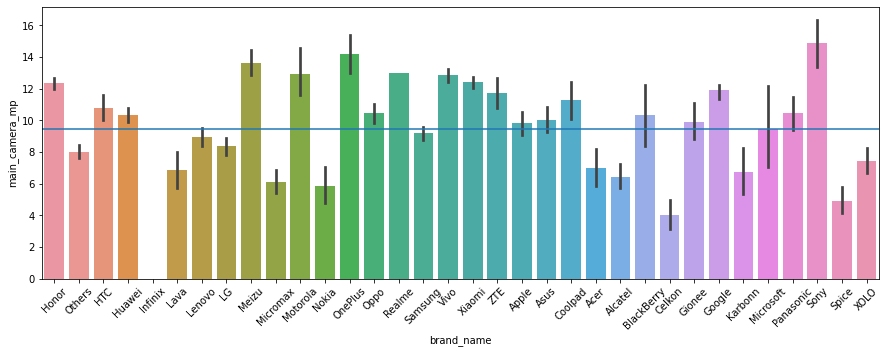

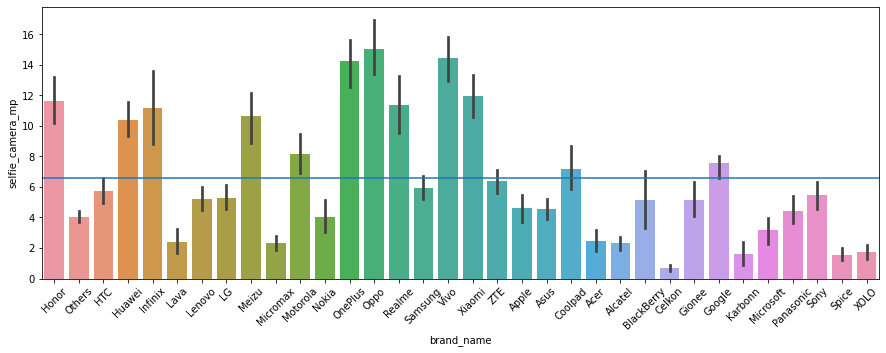

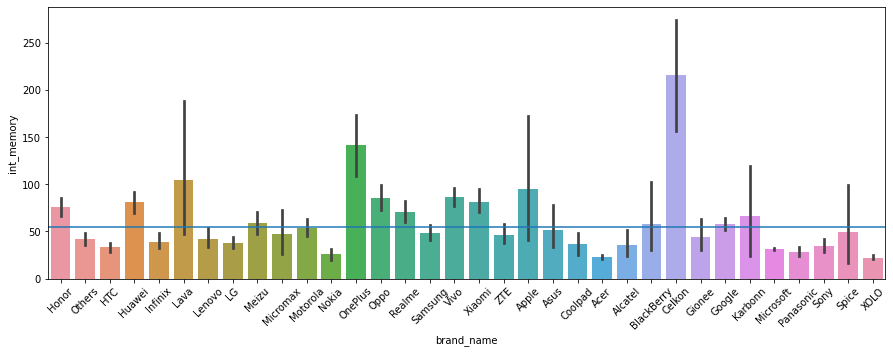

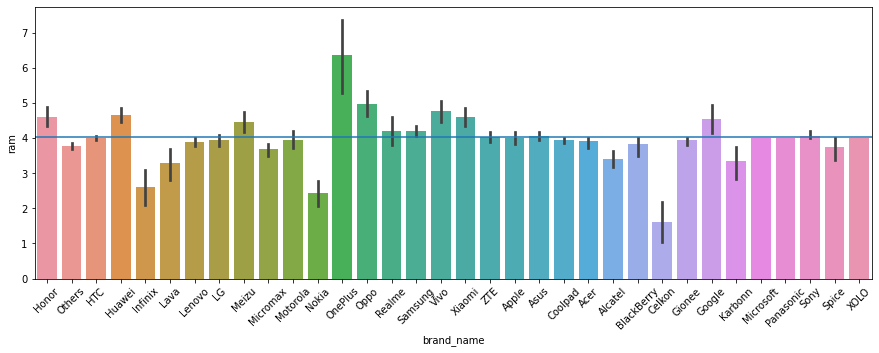

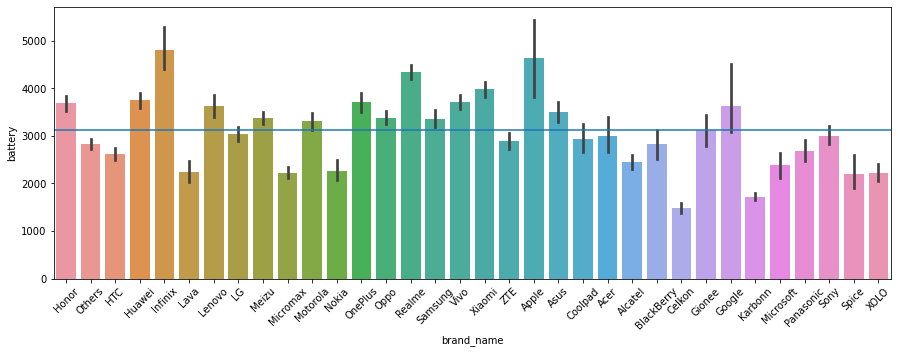

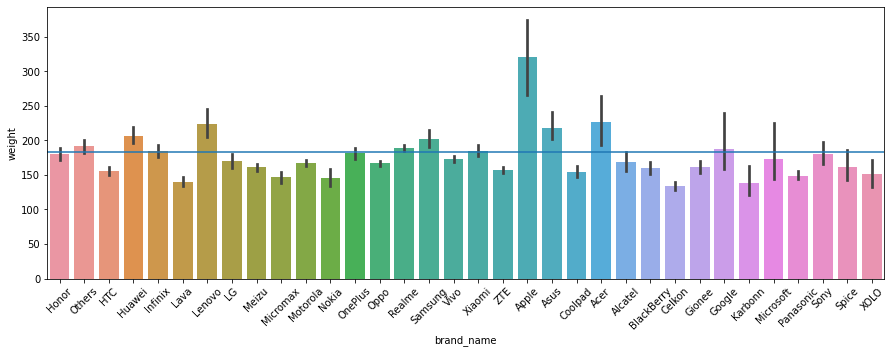

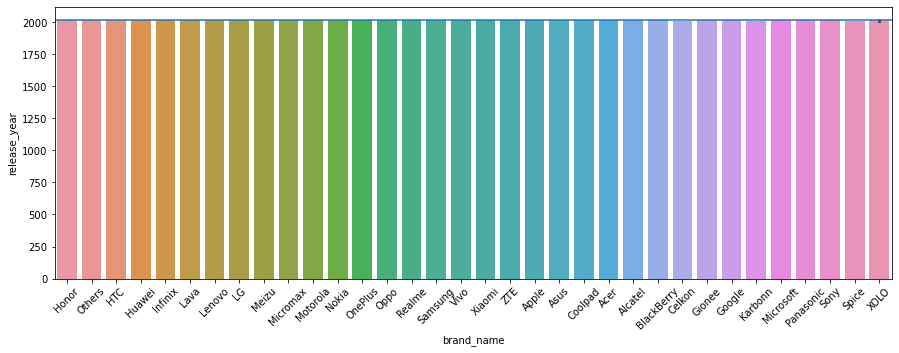

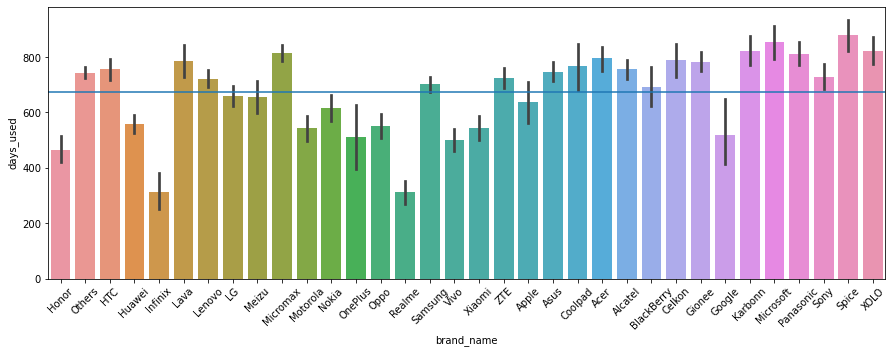

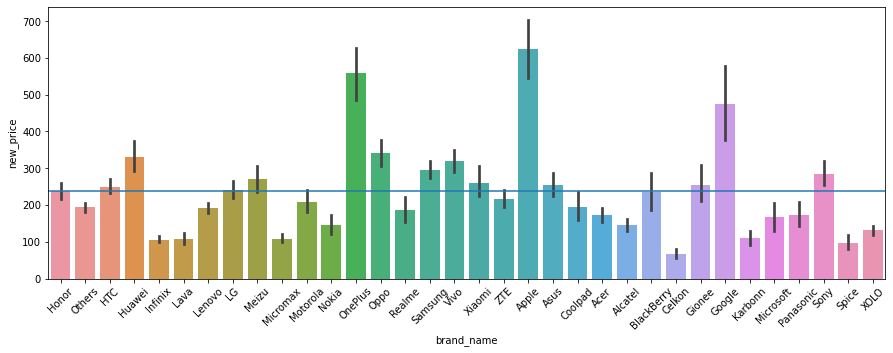

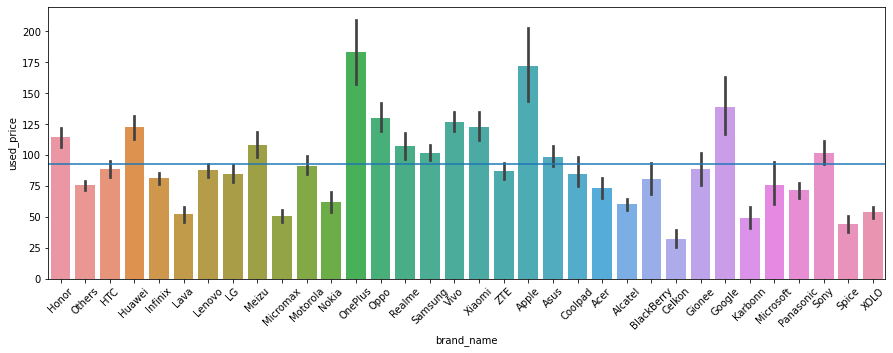

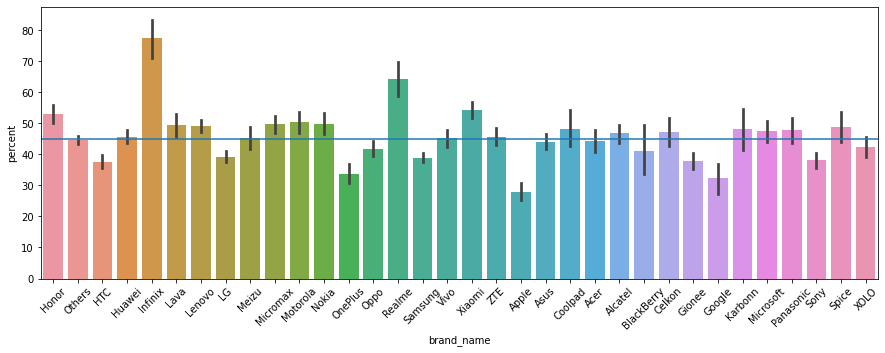

In [30]:
for i in used_device_raw.select_dtypes('number').columns:
    plt.figure(figsize=(15, 5))
    sns.barplot(data=used_device_raw, x="brand_name", y=i).axhline(used_device_raw[i].mean())
    plt.xticks(rotation=45)
    plt.show()


#### Observations

- Apple devices have the highest screen size average, Celkon, Blackberry and Nokia the lowest
- Sonic, Meizu and OnePlus have devices with the best front facing cameras, Selcon and Spice have the least quality
- Celkon, Sony and XOLO have the worst selfie cameras while OnePlus, Oppo and Vivo have the best
- Celkon, Nokia and Infinix offer RAM on the lower end, OnePlus and Oppo tend to have the most RAM
- Infinix and Apple devices have the most energy capacity, Celkon and Karbonn have the least
- Apple has by far the heaviest devices, Celkon, Karbonn, Lava and Nokia the lightest
- Infinix and Realm devices were resold after an average of about 300 days, the spice and Microsoft devices were held on to the longest about 820 days.
- Celkon definitely sells the cheapest devices, Apple, One Plus and Google sell the most expensive devices. This is true for new and used devices.
-Realm and Ininix had the least loss in value compared to the new price. Their devices resold at 65-75% of the new price, whereas Apple devices only sold for an avarage price of less than 30%.


In [31]:
used_device_raw.groupby(['release_year'])['new_price','percent','screen_size','main_camera_mp','selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight'].mean()

,new_price,percent,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight
release_year,,,,,,,,,
2013,167.592772,39.833105,11.865211,5.866667,1.144035,54.054956,3.490826,2305.588752,179.356754
2014,192.819455,39.674891,12.872788,7.689766,2.266978,32.726417,3.813240,2643.458529,181.013396
2015,198.611010,44.192583,13.032796,9.832330,3.909515,28.094047,3.885709,2802.660194,175.025787
2016,222.353890,46.238172,13.393420,11.677285,5.817493,34.527728,3.952932,3169.422572,172.749217
2017,252.496388,46.269967,13.737391,11.754209,8.252174,46.074247,3.973378,3409.565217,182.188127
2018,315.689006,45.847143,14.995559,12.385256,10.779063,79.950807,3.951211,3615.965839,184.218944
2019,318.250291,51.939529,15.964619,11.290773,14.646861,94.442027,4.613543,3986.704036,193.486883
2020,335.307184,52.756823,16.028014,8.274194,13.815884,98.889819,5.313127,4296.503610,203.385560


#### Observation
- new prize has about doubled from 2013 to 2020
- The resale price in percent as expected increased with the release year since the latter devices are newer
- The selfie camera was still in the early days in 2013, so the selfie_camera-mp increased tenfold, but has stagnated after 2019.
- screen size, internal memory, ram, battery and weight have steadily gone up after 2013
- main camera mp has doubled from 2013 to 2019, but has gone down after.

### Variety over different devices and days used/used price

In [32]:
duplicate_check = used_device_raw.drop(['used_price','days_used'], axis=1)

In [33]:
duplicate_check.duplicated().sum()

0

#### Observation
For every device type there is exactly one observation for days used and used price.

We'll take a look a seperate look at Apple since only they use IOS and Apple users tend to stay with Apple, more so than other brands. 

In [34]:
used_device_raw[used_device_raw['brand_name']=='Apple'].describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,percent
count,39,39,39.000000,39,39,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
unique,1,2,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Apple,iOS,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,36,NaN,39,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,18.510256,NaN,NaN,9.820513,4.615385,95.179487,4.000000,4628.910256,320.423077,2016.641026,636.307692,623.162564,172.015385,27.811026
std,NaN,NaN,7.107827,NaN,NaN,2.393762,2.785445,220.604298,0.606977,2638.294809,175.808603,2.158059,246.057241,273.625201,94.926910,9.256283
min,NaN,NaN,10.160000,NaN,NaN,5.000000,1.200000,16.000000,2.000000,1510.000000,112.000000,2013.000000,208.000000,270.810000,48.410000,9.210000
25%,NaN,NaN,12.830000,NaN,NaN,8.000000,1.200000,16.000000,4.000000,2674.500000,175.500000,2015.000000,533.000000,361.780000,100.520000,22.720000
50%,NaN,NaN,18.010000,NaN,NaN,12.000000,7.000000,32.000000,4.000000,3937.000000,299.000000,2017.000000,629.000000,549.540000,150.190000,27.160000
75%,NaN,NaN,24.245000,NaN,NaN,12.000000,7.000000,64.000000,4.000000,6888.000000,468.500000,2018.000000,821.000000,845.085000,223.045000,31.015000


#### Observations
- Apple sells heavier devices with large screens and a lot of energy capacity, 
- in this data there are no 5g devices yet, 
- main camera mp, ram is average, days used is about average
- selfie camera mp is below average
- the devices are on the expensive end with an average of 623, but they loose a lot of value when they are resold. 


**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

#### 1. What does the distribution of used device prices look like?

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
used_price,3454.0,92.302936,54.701648,4.65,56.4825,81.87,116.245,749.52,3094,0,2.3,4.0,0.46


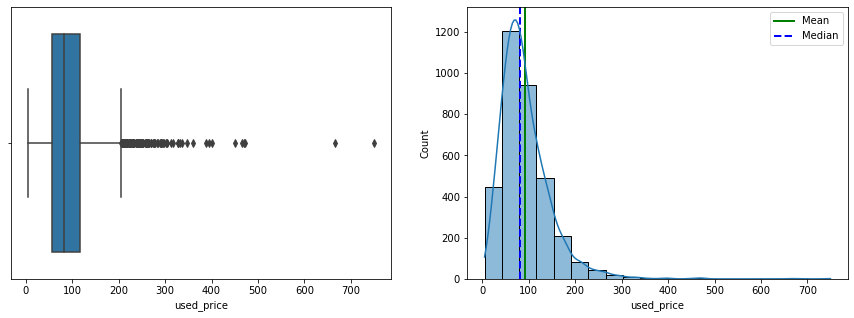

In [35]:
check_number_variable(used_device_raw,'used_price')

The distribiution of used device prices is highly right skewed with 4% outliners shown in the boxplot. For the regression later we should do a transformaton. Below we look at the log or sqrt transformation. 

,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,92.302936,54.701648,4.650000,56.482500,81.870000,116.245000,749.520000,2.316718,3.995368,0.463231
log,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433,-0.532338,2.460915,0.000000
sqrt,3454.0,9.242151,2.624419,2.156386,7.515484,9.048204,10.781697,27.377363,0.680494,1.968732,0.057904


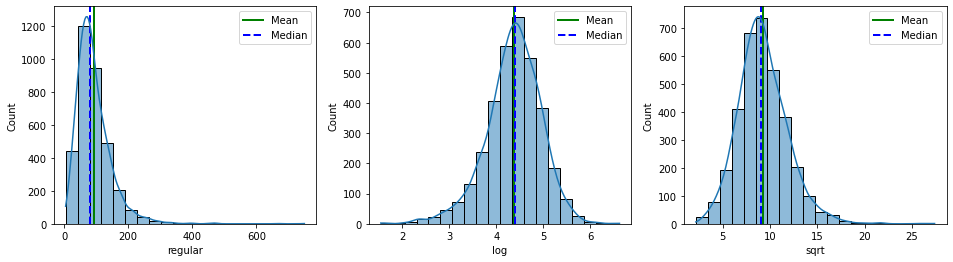

In [36]:
check_transformations(used_device_raw,'used_price',plot='yes')

The log transformation will bring skewedness down to -.5 and also take care of a lot of outliners.

#### 2. What percentage of the used device market is dominated by Android devices?

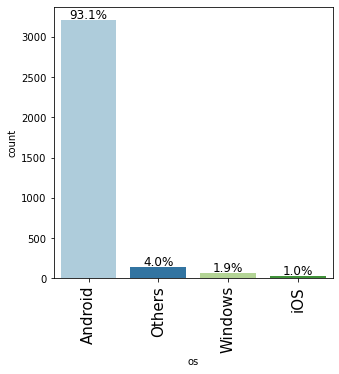

,count,unique,top,freq,missing values,%Android,%Others,%Windows,%iOS
os,3454,4,Android,3214,0,93.1,4.0,1.9,1.0


In [37]:
check_out_object(used_device_raw,'os')

#### Observation
93% of the different devices that are re-sold are Android devices. This data set only gives us the price for cell phones with different characteristics and brands, not how many of them were sold, thus the question can't really be answered.

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

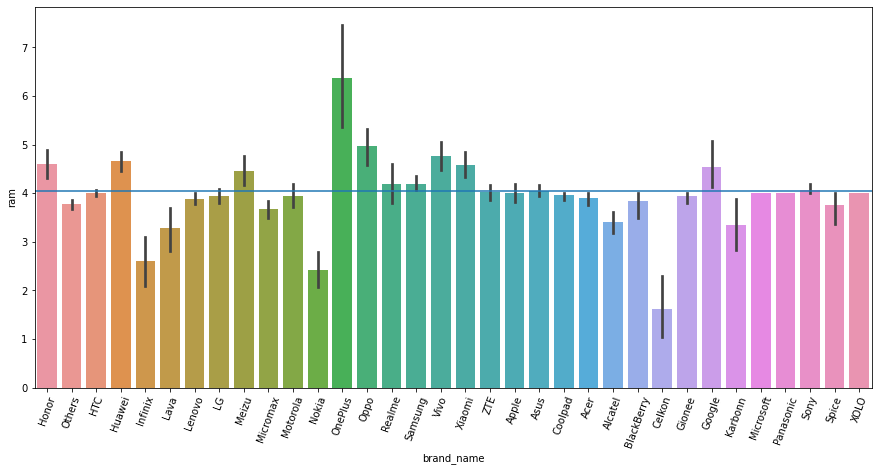

In [38]:
plt.figure(figsize=(15, 7))
sns.barplot(data=used_device_raw, x="brand_name", y="ram").axhline(used_device_raw['ram'].mean())
plt.xticks(rotation=70);

#### Observation
OnePlus devices on average have the highest ram followed by Oppo, Xiaomi, Honor and Meizu. The devices with the lowest ram on average are Celkon followed by Nokia, InfinixLava, Karbonn, Alcatel, Micromax and Others.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [39]:
large_battery=used_device_raw[used_device_raw['battery']>4500]

,count,mean,std,min,25%,50%,75%,max,unique values,missing values,skewedness,% outliers 2IQR,% outliers 4IQR
weight,341.0,332.27566,155.501832,118.0,198.0,300.0,467.0,855.0,170,0,0.8,0.29,0.0


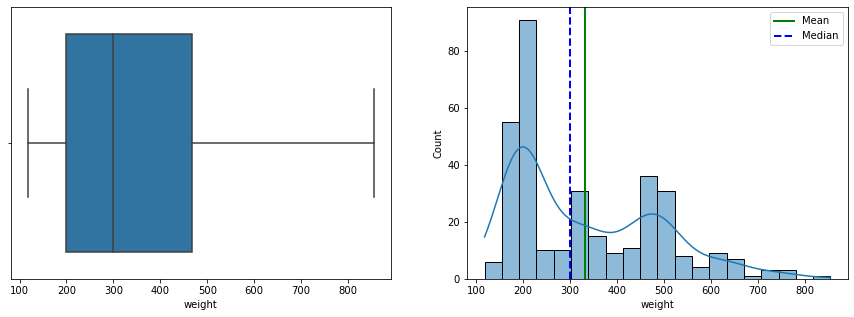

In [40]:
check_number_variable(large_battery,'weight')

#### Observation
The weight in devices with an energy capacity of over 4500mAh averages at 332g, and varies from 118g to 855g which btw is about as heavy 3 1/2 cups of water for the American reader. 

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [41]:
big_screen=used_device_raw[used_device_raw['screen_size']>6* 2.54]

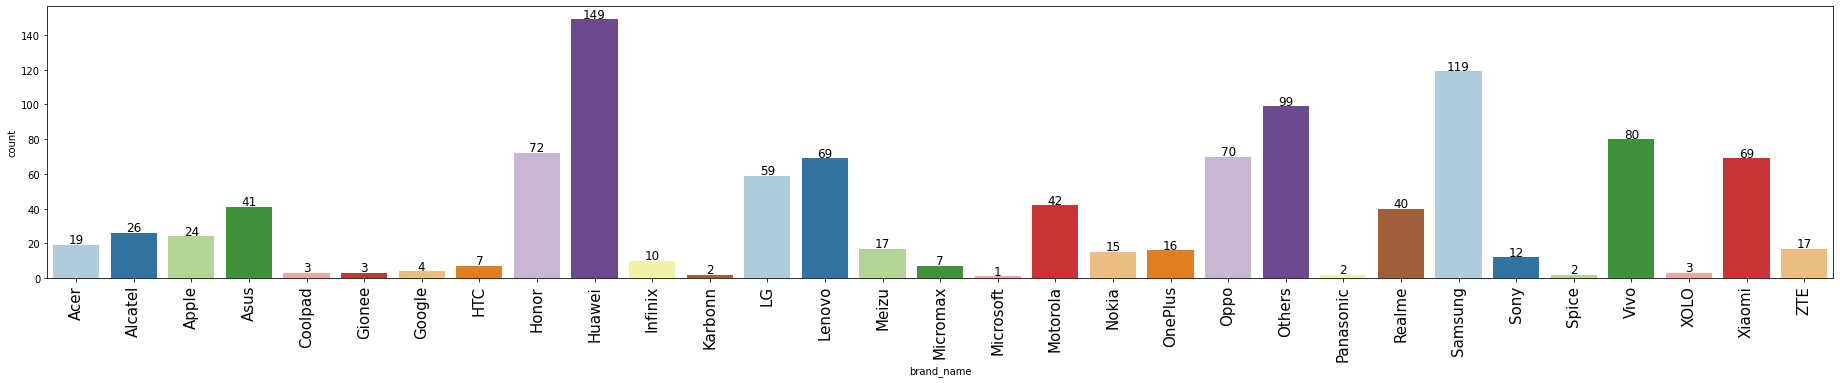

In [42]:
labeled_barplot(big_screen, 'brand_name', perc=False, n=None)

In [43]:
print(f"{big_screen['brand_name'].value_counts().shape[0]} brands offer {big_screen['brand_name'].value_counts().sum()} devices with screens of 6inch and larger.")
#print('big_screen['brand_name'].value_counts().sum()/2

31 brands offer 1099 devices with screens of 6inch and larger.


In [44]:
big_screen['brand_name'].value_counts().head(7).sum()

658

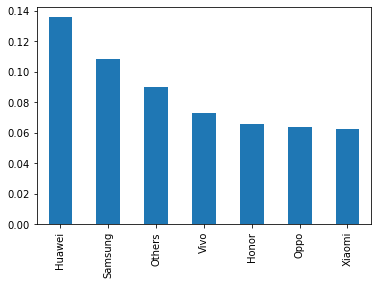

In [45]:
big_screen['brand_name'].value_counts(1).head(7).plot.bar(); #Top 7 brand names with about 50% of the market

The top 7 brands that sell devices with large screens are Huawei, Samsung, Others, Vivo, Honor, Oppo and Lenovo.

#### 6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?


In [46]:
selfie=used_device_raw[(used_device_raw['selfie_camera_mp']>=8)& (used_device_raw['new_price']<150)]

In [47]:
print(f"{selfie['brand_name'].value_counts().shape[0]} brands offer {selfie['brand_name'].value_counts().sum()} devices that are affordable with great selfie cameras.")
#print('big_screen['brand_name'].value_counts().sum()/2

22 brands offer 146 devices that are affordable with great selfie cameras.


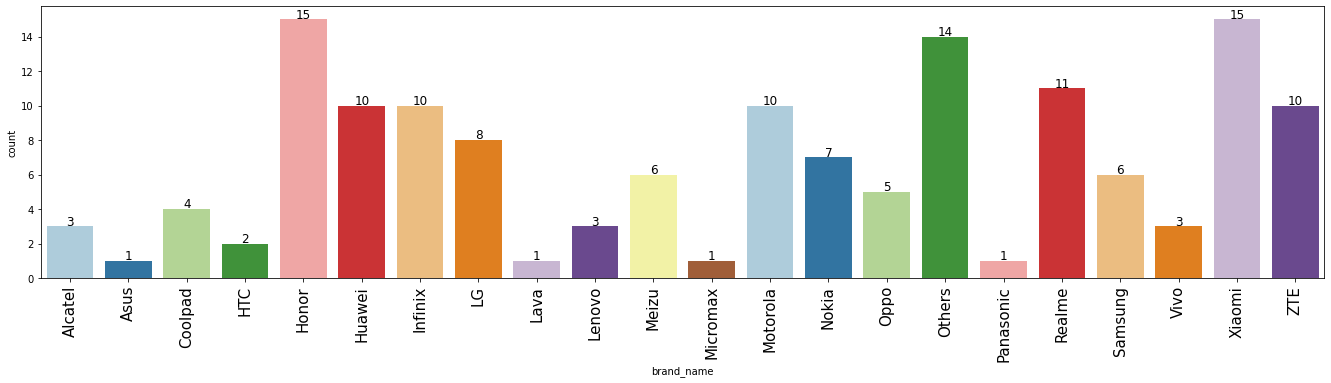

In [48]:
labeled_barplot(selfie, 'brand_name', perc=False, n=None)

Honor, Xiaomi and Realme sell the most of those devices, and also 'Others'.

#### 7. Which attributes are highly correlated with the price of a used device?

As per our heatmap above the only attribute that is highly correlated with the price of a used device is the new price, which is positively correlted with a correlation coefficient of .81.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [49]:
used_device=used_device_raw.drop('percent', axis=1).copy() # new df for modifications

#### Missing Values

In [50]:
used_device.isnull().sum() #Missing values

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

#### main_camera_mp missing values

In [51]:
main_missing =  used_device[used_device['main_camera_mp'].isnull()] # df - only missing main_camera_mp

In [52]:
main_missing.describe(include="object").T #categories of data set from the missing data

,count,unique,top,freq
brand_name,179,15,Realme,36
os,179,1,Android,179
4g,179,1,yes,179
5g,179,2,no,112


In [53]:
main_missing.describe(exclude="object")

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,179.000000,0.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,15.845587,NaN,15.458101,102.793296,5.480447,4304.134078,189.718436,2019.603352,287.117318,340.289162,139.702737
std,0.973714,NaN,7.717788,62.725877,2.450271,589.947345,18.008417,0.648412,129.705642,240.954430,60.342164
min,10.290000,NaN,5.000000,32.000000,2.000000,2870.000000,150.000000,2017.000000,91.000000,40.080000,14.400000
25%,15.340000,NaN,8.000000,64.000000,4.000000,4000.000000,178.000000,2019.000000,194.500000,154.000000,93.530000
50%,15.390000,NaN,16.000000,128.000000,6.000000,4200.000000,190.200000,2020.000000,273.000000,271.150000,128.060000
75%,16.640000,NaN,16.000000,128.000000,8.000000,5000.000000,202.500000,2020.000000,348.500000,484.700000,169.205000
max,17.810000,NaN,32.000000,256.000000,12.000000,6000.000000,253.000000,2020.000000,875.000000,1200.850000,327.680000


The missing data only appears in data rows with Android models and 4g=yes. Internal Memory and release year have the same maximum, but a higher minimum. For everything else the missing data is in the middle. So let's just replace the missing values with the mean of main_camera_mg over all 4g=yes Android models with a screen size above 10 and a release year of 2017 and up.

In [54]:
#Finding the mean within the above mentioned limits
mean_main=used_device[(used_device['4g']=='yes')&(used_device['os']=='Android')&(used_device['screen_size']>10.3)&(used_device['release_year']>=2017)]['main_camera_mp'].mean()
used_device.loc[used_device['main_camera_mp'].isnull(),'main_camera_mp']=mean_main

#### Remaining missing values

In [55]:
missing_few=used_device[used_device.isnull().any(axis=1)] # remaining missing values
missing_few

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,18.38,15.32
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,39.98,15.20
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,40.01,21.39
1080,Google,Android,15.32,yes,no,12.2,NaN,64.00,4.00,3430.0,184.0,2018,475,959.08,263.44
1081,Google,Android,12.83,yes,no,12.2,NaN,64.00,4.00,2915.0,148.0,2018,424,849.87,86.92
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,129.49,65.23
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,399.67,131.48
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,339.04,114.70
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,331.21,186.90
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,30.58,10.42


The missing weight values are a bit all over the place, so we'll impute them with the mean over the release year.

In [56]:
cols_missingVal=used_device.columns[used_device.isnull().any()] #columns with missing values in them
#circle through cols with missing values and fill with the mean of that column grouped by the release year
for col in cols_missingVal: 
    used_device[col] = used_device.groupby(['release_year'])[col].transform(
        lambda x: x.fillna(x.mean()))

In [57]:
used_device.isnull().sum().sum() #check missing values

0

### Feature engineering (if needed)

#### Correlated Values

Since weight, battery and screen size are highly correlated, we will drop weight and battery, since the screen sized data is the least skewed. 

In [58]:
used_device.drop(['weight', 'battery'], axis=1, inplace=True)

#### 4g and 5g

Let's put the 4g and 5g columns into one Network category column with none, 4g and 4g_5g

In [59]:
used_device['network']='4g'
used_device.loc[used_device['4g']=="no",'network']="none"
used_device.loc[used_device['5g']=="yes",'network']="4g_5g"
used_device['network'].value_counts()

4g       2183
none     1119
4g_5g     152
Name: network, dtype: int64

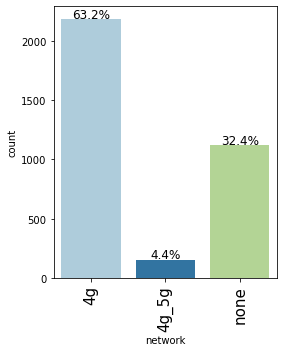

,count,unique,top,freq,missing values,%4g,%none,%4g_5g
network,3454,3,4g,2183,0,63.2,32.4,4.4


In [60]:
check_out_object(used_device,'network')

### Variable Transformations


Let's just take a look at afew variables and see if we can improve the distribiution with a transformation.

In [61]:
num_cols = [
    item for item in used_device.select_dtypes(include=np.number).columns
]
num_cols
for i in num_cols:
    print(i)
    check_transformations(used_device,i)
    print("\n")

screen_size


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000,1.023932,9.988419,3.474233
log,3454.0,2.580292,0.281081,1.625311,2.541602,2.551786,2.730464,3.424588,-0.538903,13.028373,3.068906
sqrt,3454.0,3.668585,0.504649,2.253886,3.563706,3.581899,3.916631,5.541660,0.276850,12.999421,3.474233




main_camera_mp


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,9.577083,4.715568,0.080000,5.000000,10.000000,13.000000,48.000000,0.704170,0.144760,0.115808
log,3454.0,2.072952,0.744123,-2.525729,1.609438,2.302585,2.564949,3.871201,-2.099601,2.837290,0.028952
sqrt,3454.0,2.979323,0.837208,0.282843,2.236068,3.162278,3.605551,6.928203,-0.572865,0.173712,0.000000




selfie_camera_mp


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,6.556676,6.969094,0.000000,2.000000,5.000000,8.000000,32.000000,1.800671,6.398379,2.721482
log,3454.0,1.124273,1.783117,-10.414313,0.693162,1.609444,2.079445,3.465737,-3.163662,15.373480,1.129126
sqrt,3454.0,2.223938,1.269346,0.000000,1.414214,2.236068,2.828427,5.656854,0.631006,2.721482,0.000000




int_memory


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,54.588368,84.929755,0.01000,16.000000,32.000000,64.000000,1024.000000,5.796262,3.995368,3.995368
log,3454.0,3.473453,1.064403,-4.60517,2.772589,3.465736,4.158883,6.931472,-1.496157,2.721482,1.042270
sqrt,3454.0,6.447949,3.607782,0.10000,4.000000,5.656854,8.000000,32.000000,2.524627,3.995368,1.505501




ram


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,4.036679,1.364692,0.020000,4.000000,4.000000,4.000000,12.000000,1.068138,18.50029,18.50029
log,3454.0,1.273833,0.716259,-3.912023,1.386294,1.386294,1.386294,2.484907,-4.701386,18.50029,18.50029
sqrt,3454.0,1.969280,0.398326,0.141421,2.000000,2.000000,2.000000,3.464102,-1.732474,18.50029,18.50029




release_year


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000,0.322297,0.0,0.0
log,3454.0,7.608853,0.001140,7.607381,7.607878,7.608623,7.609862,7.610853,0.321145,0.0,0.0
sqrt,3454.0,44.899494,0.025593,44.866469,44.877611,44.894320,44.922155,44.944410,0.321721,0.0,0.0




days_used


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000,-0.343977,0.000000,0.000000
log,3454.0,6.420623,0.479933,4.510860,6.279458,6.537416,6.767055,6.997596,-1.341423,8.048639,0.289519
sqrt,3454.0,25.437543,5.273439,9.539392,23.097611,26.277365,29.474564,33.075671,-0.786046,2.374059,0.000000




new_price


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,237.038848,194.302782,18.200000,120.342500,189.785000,291.115000,2560.200000,3.818587,5.703532,1.592357
log,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841,-0.077026,1.795020,0.000000
sqrt,3454.0,14.509515,5.149806,4.266146,10.970073,13.776248,17.062092,50.598419,1.385696,3.271569,0.260567




used_price


,count,mean,std,min,25%,50%,75%,max,skewedness,% 2IQRoutliers,% 4IQRoutliers
regular,3454.0,92.302936,54.701648,4.650000,56.482500,81.870000,116.245000,749.520000,2.316718,3.995368,0.463231
log,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433,-0.532338,2.460915,0.000000
sqrt,3454.0,9.242151,2.624419,2.156386,7.515484,9.048204,10.781697,27.377363,0.680494,1.968732,0.057904


#### Observation
- For used price, new price the log transformation is the way to go. 
- For the selfie camera the square root transformation looks promising.
- For everything else, we'll give it a try and if it doesn't work, revisit.

In [62]:
used_device['new_price_log']=np.log(used_device['new_price'])
used_device['used_price_log']=np.log(used_device['used_price'])
used_device['selfie_camera_sqrt']=np.sqrt(used_device['selfie_camera_mp']) 

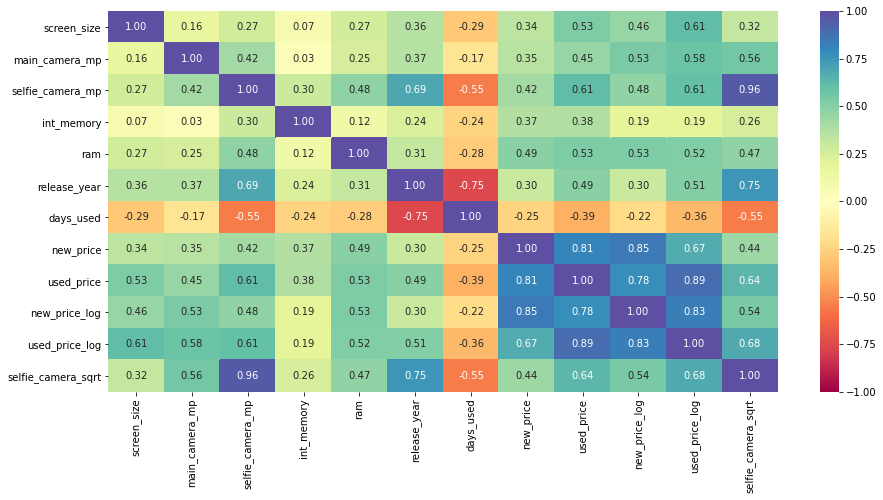

In [63]:
plt.figure(figsize=(15, 7))
sns.heatmap(used_device.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

A look at the heat map shows us, that release_year and days_used are correlated and also release_year and selfie_camera_sqrt. We will drop the days_used and both selfie_camera columns. 

In [64]:
used_device.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'release_year', 'days_used',
       'new_price', 'used_price', 'network', 'new_price_log', 'used_price_log',
       'selfie_camera_sqrt'],
      dtype='object')

In [65]:
used_device.drop(['new_price','4g','5g','used_price', 'selfie_camera_mp', 'selfie_camera_sqrt', 'days_used',], axis=1, inplace=True)

In [66]:
used_device.columns

Index(['brand_name', 'os', 'screen_size', 'main_camera_mp', 'int_memory',
       'ram', 'release_year', 'network', 'new_price_log', 'used_price_log'],
      dtype='object')

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [67]:
checkthedata(used_device)

,brand_name,os,screen_size,main_camera_mp,int_memory,ram,release_year,network,new_price_log,used_price_log
0,Honor,Android,14.5,13.0,64.0,3.0,2020,4g,4.715100,4.307572
1,Honor,Android,17.3,13.0,128.0,8.0,2020,4g_5g,5.519018,5.162097


,brand_name,os,screen_size,main_camera_mp,int_memory,ram,release_year,network,new_price_log,used_price_log
3452,Alcatel,Android,15.80,13.0,32.0,2.0,2020,4g,4.624188,4.349762
3453,Alcatel,Android,12.83,13.0,16.0,2.0,2020,4g,4.279994,4.132122


,brand_name,os,screen_size,main_camera_mp,int_memory,ram,release_year,network,new_price_log,used_price_log
866,Others,Android,15.24,8.000000,16.0,4.00,2014,none,5.190788,4.038832
957,Celkon,Android,10.16,3.150000,512.0,0.25,2013,none,3.884652,2.800325
280,Infinix,Android,15.39,11.715449,32.0,2.00,2020,4g,4.487287,4.370713
2150,Oppo,Android,12.83,13.000000,64.0,4.00,2017,4g,5.639422,4.677863
93,LG,Android,15.29,13.000000,32.0,3.00,2019,4g,5.300415,4.517650
1040,Gionee,Android,12.83,13.000000,32.0,4.00,2016,4g,5.634325,4.645640
3170,ZTE,Others,10.16,3.150000,16.0,4.00,2014,none,4.244344,3.764451
2742,Sony,Android,12.70,20.700000,16.0,4.00,2013,4g,5.799820,4.422809
102,Meizu,Android,15.29,11.715449,128.0,6.00,2019,4g,6.040659,4.959412
1195,HTC,Android,10.29,8.000000,32.0,4.00,2015,none,4.879007,4.227855


There are 3454 rows and 10 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      3454 non-null   object 
 1   os              3454 non-null   object 
 2   screen_size     3454 non-null   float64
 3   main_camera_mp  3454 non-null   float64
 4   int_memory      3454 non-null   float64
 5   ram             3454 non-null   float64
 6   release_year    3454 non-null   int64  
 7   network         3454 non-null   object 
 8   new_price_log   3454 non-null   float64
 9   used_price_log  3454 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 270.0+ KB


None


Describe Data:

Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.577083,4.715568,0.080000,5.000000,10.000000,13.000000,48.000000
int_memory,3454.0,54.588368,84.929755,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.036679,1.364692,0.020000,4.000000,4.000000,4.000000,12.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
new_price_log,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841
used_price_log,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433



Non Numerical Variables:


,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
network,3454,3,4g,2183



Missing Values:
brand_name        0
os                0
screen_size       0
main_camera_mp    0
int_memory        0
ram               0
release_year      0
network           0
new_price_log     0
used_price_log    0
dtype: int64

Duplicates:
0


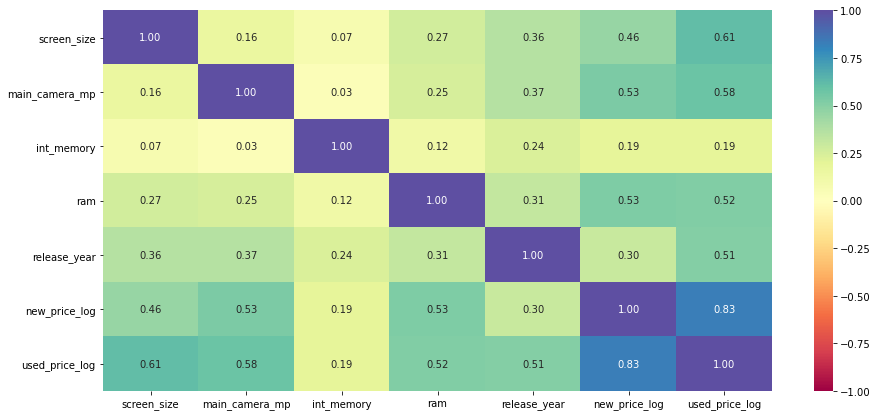

In [68]:
plt.figure(figsize=(15, 7))
sns.heatmap(used_device.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Data looks all good! 

### Create Dymmy Variables

In [69]:
# drop_first=True will drop one of the three origin columns
used_device = pd.get_dummies(used_device, columns=["brand_name","os","network"], drop_first=True)
used_device.head()

,screen_size,main_camera_mp,int_memory,ram,release_year,new_price_log,used_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,network_4g_5g,network_none
0,14.50,13.0,64.0,3.0,2020,4.715100,4.307572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17.30,13.0,128.0,8.0,2020,5.519018,5.162097,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16.69,13.0,128.0,8.0,2020,5.884631,5.111084,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,25.50,13.0,64.0,6.0,2020,5.630961,5.135387,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15.32,13.0,64.0,3.0,2020,4.947837,4.389995,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
used_device.shape

(3454, 45)

In [71]:
used_device.isnull().sum().sum() # make sure no missing variables so the model works

0

## Building a Linear Regression model

In [72]:
# independent variables
X = used_device.drop(["used_price_log"], axis=1)
# dependent variable
y = used_device["used_price_log"]

In [73]:
# let's add the intercept to data
X = sm.add_constant(X)

In [74]:
# create the test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [75]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [76]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     268.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:08   Log-Likelihood:                 31.806
No. Observations:                2417   AIC:                             26.39
Df Residuals:                    2372   BIC:                             287.0
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -64.48

In [77]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

# a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp


In [78]:
checking_vif(X_train)

,feature,VIF
0,const,1.920081e+06
1,screen_size,1.700466e+00
2,main_camera_mp,2.121108e+00
3,int_memory,1.338454e+00
4,ram,2.142017e+00
5,release_year,2.484049e+00
6,new_price_log,2.996370e+00
7,brand_name_Alcatel,3.398977e+00
8,brand_name_Apple,1.295005e+01
9,brand_name_Asus,3.324837e+00


In [79]:
#Columns with a VIF over 5
col_list = [
    "brand_name_Huawei",
    "brand_name_Samsung",
    'brand_name_Others'
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.829574,0.241013
1,brand_name_Huawei,0.829569,0.241017
2,brand_name_Samsung,0.829541,0.241036


Let's drop Others

In [80]:
col_to_drop = "brand_name_Others"
X_train2 =X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif[vif['VIF']>5]

VIF after dropping  brand_name_Others


,feature,VIF
0,const,1.919534e+06
8,brand_name_Apple,1.208850e+01
41,os_iOS,1.170848e+01


Apple products popped up, which is obvious that the Apple brand and the IOS operating system are correlated.

In [81]:
#Columns with a VIF over 5
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.829621,0.240980
1,brand_name_Apple,0.829538,0.241039


Let's drop Apple.

In [82]:
col_to_drop = "brand_name_Apple"
X_train3 =X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif[vif['VIF']>5]

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,1.917911e+06


VIFs are good. Let's run the model again and look at the p-values.

In [83]:
olsmod = sm.OLS(y_train, X_train3)
olsres = olsmod.fit()

In [84]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     280.9
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:12   Log-Likelihood:                 31.022
No. Observations:                2417   AIC:                             23.96
Df Residuals:                    2374   BIC:                             272.9
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -64.26

We'll circle through the model as long as there are p-values over 0.05, always eliminting the largest one. 

In [85]:
# initial list of columns
cols = X_train3.columns.tolist()
cols_dropped=[]

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        cols_dropped.append(feature_with_p_max)
    else:
        break

selected_features = cols
print("Features that we keep:\n",selected_features)
print("\nFeatures that we dropped:\n",cols_dropped)

Features that we keep:
 ['const', 'screen_size', 'main_camera_mp', 'int_memory', 'ram', 'release_year', 'new_price_log', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Oppo', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'network_none']

Features that we dropped:
 ['brand_name_Alcatel', 'brand_name_ZTE', 'brand_name_XOLO', 'brand_name_Motorola', 'brand_name_HTC', 'brand_name_Lava', 'brand_name_Spice', 'brand_name_Asus', 'brand_name_Meizu', 'brand_name_Huawei', 'brand_name_Vivo', 'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Realme', 'os_Windows', 'os_Others', 'brand_name_Infinix', 'brand_name_Gionee', 'brand_name_Honor', 'brand_name_OnePlus', 'brand_name_Panasonic', 'brand_name_BlackBerry', 'brand_name_Google', 'brand_name_Microsoft', 'brand_name_Micromax', 'brand_name_LG', 'brand_name_Karbonn', 'network_4g_5g', 'os_iOS']


In [86]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]
olsmodel4 = sm.OLS(y_train, X_train4).fit()
print(olsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     908.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:12   Log-Likelihood:                 19.349
No. Observations:                2417   AIC:                            -10.70
Df Residuals:                    2403   BIC:                             70.37
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -63.2593      6

## Model performance evaluation

In [87]:
# to check model performance
# import some functions from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression_exp(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    # using the exp-function to reverse the log-transformation of used_price
    pred_exp = np.exp( model.predict(predictors))
    target_exp = np.exp(target)


    r2 = r2_score(target_exp, pred_exp)  # to compute R-squared
#    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target_exp, pred_exp))  # to compute RMSE
    mae = mean_absolute_error(target_exp, pred_exp)  # to compute MAE
    mape = mape_score(target_exp, pred_exp)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression_exp(olsmodel4, X_train4,y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,MAPE
0,25.938269,17.298844,0.781323,19.634247


In [89]:
# checking model performance on train set (seen 70% data)
print("Test Performance\n")
olsmodel_train_perf = model_performance_regression_exp(olsmodel4, X_test4, y_test)
olsmodel_train_perf

Test Performance



,RMSE,MAE,R-squared,MAPE
0,25.337911,17.261208,0.770087,20.064851


The numbers for the training and the test set are similar, so from this account the model looks good! 

Let's do a quick check of the regression assumption.

## Checking Linear Regression Assumptions

For Linear Regression, we need to check if the following assumptions hold:-

- Linearity
- Independence
- Homoscedasticity
- Normality of error terms
- No strong Multicollinearity

We have been assured that our sample data is independent. And we took care of the Multiculinearity when we tested the VIFs.For the other tests we look at the residuals.

In [90]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel4.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel4.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.890076,0.197412
1525,4.448399,4.646879,-0.198480
1128,4.315353,4.287650,0.027702
3003,4.282068,4.243316,0.038752
2907,4.456438,4.341287,0.115151


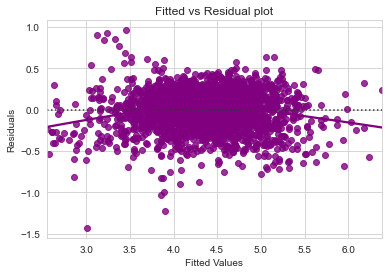

In [91]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The dots look random enough and don't have a pattern - we can assume linearity. 

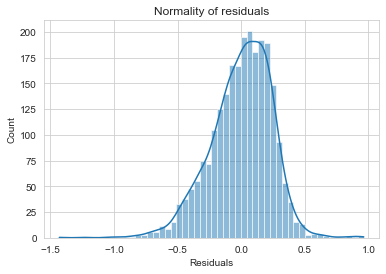

In [92]:
# distribution of residuals
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

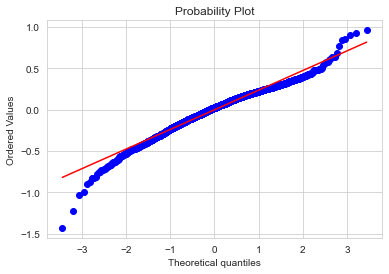

In [93]:
# QQ-plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [94]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9774931073188782, pvalue=4.2756180041284075e-19)

Both the distribiution and the qq-plot are 'normal enough'. And as we will see below, all other assumtions are fullfilled. So we will assume normality even though we failed the Shapiro Test. 

#### Test for Homoscedasticity
We'll run the Goldfeld-Quant test.

In [95]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [96]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.032715743936233), ('p-value', 0.28904288245835863)]

Since p-value > 0.05 we can say that the residuals are homoscedastic.

## Final Model Summary

In [97]:
print(olsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     908.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:19   Log-Likelihood:                 19.349
No. Observations:                2417   AIC:                            -10.70
Df Residuals:                    2403   BIC:                             70.37
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -63.2593      6

In [98]:
# Let us write the equation of linear regression and make a list of which valuables let the price increase or decrease

# set up 2 data frames to compare the individual parameters 'in their natural habitat'
up=pd.DataFrame(columns=["name",'minmax_multiplier'])
down=pd.DataFrame(columns=["name",'minmax_multiplier'])

Equation = "Model Equation: \nLog Price ="
print(Equation, end=" ")
# circle through all columns of the remaining training set
for i in range(len(X_train4.columns)):
    print()
    # the individual parameter multiplied by maximum-minimum 
    min_max=(X_train4[X_train4.columns[i]].max()-X_train4[X_train4.columns[i]].min())*model.params[i]
    
    # if parameter positive -> up, if negative -> down
    if model.params[i]>0:up=up.append({"name":X_train4.columns[i],'minmax_multiplier':min_max}, 
                ignore_index = True)
    else: down=down.append({"name":X_train4.columns[i],'minmax_multiplier':min_max}, 
                ignore_index = True)
    
    # writing the equation
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            "(",
            model.params[i],
            ")*(",
            X_train4.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", model.params[i], ")*(", X_train4.columns[i], ")")
        
print("\n\nPrice goes up when when the following goes up: \n",up)
print("\nPrice goes down when the following goes up: \n",down)




Model Equation: 
Log Price = 
-63.259325188392594 + 
( 0.04171954032243505 )*( screen_size ) + 
( 0.021858142052327105 )*( main_camera_mp ) + 
( 0.00019853175307700782 )*( int_memory ) + 
( 0.030668296261319342 )*( ram ) + 
( 0.03193491349220047 )*( release_year ) + 
( 0.44665883703237835 )*( new_price_log ) + 
( 0.044849392528875084 )*( brand_name_Lenovo ) + 
( 0.07429990275668924 )*( brand_name_Nokia ) + 
( 0.06255407548481937 )*( brand_name_Oppo ) + 
( -0.03403659827980615 )*( brand_name_Samsung ) + 
( -0.07001974487687956 )*( brand_name_Sony ) + 
( 0.10113338692811535 )*( brand_name_Xiaomi ) + 
( -0.03979013209010397 )*( network_none )


Price goes up when when the following goes up: 
                 name  minmax_multiplier
0        screen_size           1.069272
1     main_camera_mp           1.047442
2         int_memory           0.203285
3                ram           0.367406
4       release_year           0.223544
5      new_price_log           2.209362
6  brand_name_Lenovo 

The table above is the individual parameter multiplied by maximum-minimum of the respective column. This is just a way to compare which variable has more or less impact.
As we can see and as was expected: new_price_log has the greatest impact. screen-size and main_camera_mp are significant as well.

## Actionable Insights and Recommendations

- 



It would also be interesting to see what happens to the prices of devices once the next generation is released. Since we only have one sample per device, we can't really compare this.

Problem with the data:
- we don't know how many of these devices are being sold
- we don't know the cut that a company makes per sale
- we don't know if the used price is the price the company pays for the used device or their resale price

Appendix:

I also ran the regression with used_price/new_price (percent-column). This is the result:

R-squared: 0.584
Adj. R-squared: 0.582

Model Equation: 
used_price/new_price = -3392.295216388065 + ( 1.6846925693233827 )*( screen_size ) + ( 0.8333397405353968 )*( main_camera_mp ) + ( 0.008560900669787173 )*( int_memory ) + ( 1.2883727434638628 )*( ram ) + ( 1.7456154408757054 )*( release_year ) + ( -22.57412308646231 )*( new_price_log ) + ( 9.017498631790012 )*( brand_name_Infinix ) + ( 5.523576319309219 )*( brand_name_Karbonn ) + ( -1.9920778171092848 )*( brand_name_LG ) + ( 3.3747007908579363 )*( brand_name_Nokia ) + ( -3.1199818505683115 )*( brand_name_Sony ) + ( 4.020347037987818 )*( brand_name_Xiaomi ) + ( -2.67297122187199 )*( network_4g_5g ) + ( -1.5555062776279156 )*( network_none )


used_price/new_price goes up when when the following goes up: 

 ['screen_size', 'main_camera_mp', 'int_memory', 'ram', 'release_year', 'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_Nokia', 'brand_name_Xiaomi']
 

used_price/new_price goes down when the following goes up: 

 ['const', 'new_price_log', 'brand_name_LG', 'brand_name_Sony', 'network_4g_5g', 'network_none']